### 基础类定义

In [9]:
# 位置定义, 这个不重要
class Pos(object):
    pass 

class Token(object):
    def __init__(self, token_type, token_val):
        self.token_type = token_type
        self.token_val = token_val

class Node(object):
    def __init__(self, node_type):
        self.token = token
        self.node_type = node_type # node的类型, number类型, identifier 类型, string类型, keyword, operator, struct, union ...
        self.node_value = node_value
# 编译器定义
class Compiler(object):
    def __init__(self):
        self.flags = 0
        self.pos = Pos()

        # tokens
        self.tokens = []

        # 节点
        self.nodes = []
        self.nodeTrees = []

### parser 解析token

#### 每次读取一个新的token

In [10]:
def token_next():
    ## 先预读一个token, 但是不会pop
    ## 但是有一种特殊情况需要考虑, 没有实际意义的token, 总共包括三种, 如果token的类型等于单行的注释, 多行的注释, #define 里边的 \
    ## 上面这三种情况可以直接跳过, 再继续读取下一个token， 依次循环, 直至符合条件的token出现
    pass

def token_peek_next():
    ## 跟token_next一样, 唯一不同的是不会把当前tokens pop
    pass 

### 解析的主流程[27]

In [11]:
def parse_single_token_to_node(compiler: Compiler):
    ## 读取一个token, 判断token类型
    ## 1. 如果是数字类型，创建node, type为数字类型的
    ## 2. 如果是identifier类型, type为identifier的
    ## 3. 如果是字符串类型, type为字符串的
    ## 将节点往compiler的节点list push.
    pass 

def parse_next():

    ## 在一个大循环内部
    ## 依次读取每一个token
    ## 如果类型在数字类型， identifier，字符串的, 通过 `parse_single_token_to_node` 创建节点，并返回 0 代表外边的parse仍需要调用该函数来读取新的node
    ## 返回 -1 代表不需要读取新的token解析
    pass 


def parse():
    ## 不断的调用parse_next
    pass 
    

### 解析简单数学的表达式[28]
#### 解决简单的加法表达式 i.g. 1000 + 100 

In [12]:
def parse_expressionable_for_op():
    ## 调用 `parse_expressionable` 递归的解析节点
    pass 

def parse_exp_normal():
    
    ## 获取队头的node为left_node
    ## 判断left_node是否为空, 是空就直接返回
    ## 当前node队头pop出来
    ## 调用`token_next`将指针下移到表达式右边的token上
    ## 调用 `parse_expressionable_for_op` 递归的获得右节点
    ## 然后对左右节点进行冲排序合并
    ## 最终得到一个新的节点, 并push到队列中

    
    pass 

def parse_exp():
    ## 调用 `parse_exp_normal`
    pass 


def parse_expressionable_single_node():
    # 判断当前的token类型, 如果是数字, 那么调用 `parse_single_token_to_node`, 并返回0代表需要继续解析token获取新的node
    # 如果当前的token类型是operator, 那么调用`parse_exp` 解析表达式
    pass 


def parse_expressionable():
    ## 在一个循环内一次调用parse_expressionable_single_node, 如果返回的是0, 那么继续, 否则跳出循环
    pass 


def parse_next():

    ## 在一个大循环内部
    ## 依次读取每一个token
    ## 如果类型在数字类型， identifier，字符串的, 通过 `parse_expressionable` 创建节点，并返回 0 代表外边的parse仍需要调用该函数来读取新的node
    ## 返回 -1 代表不需要读取新的token解析
    pass 


### 解析带有优先级的数学表达式[29-30]
i.g. 1000+100*20

运算符优先级链接 
https://en.cppreference.com/w/c/language/operator_precedence

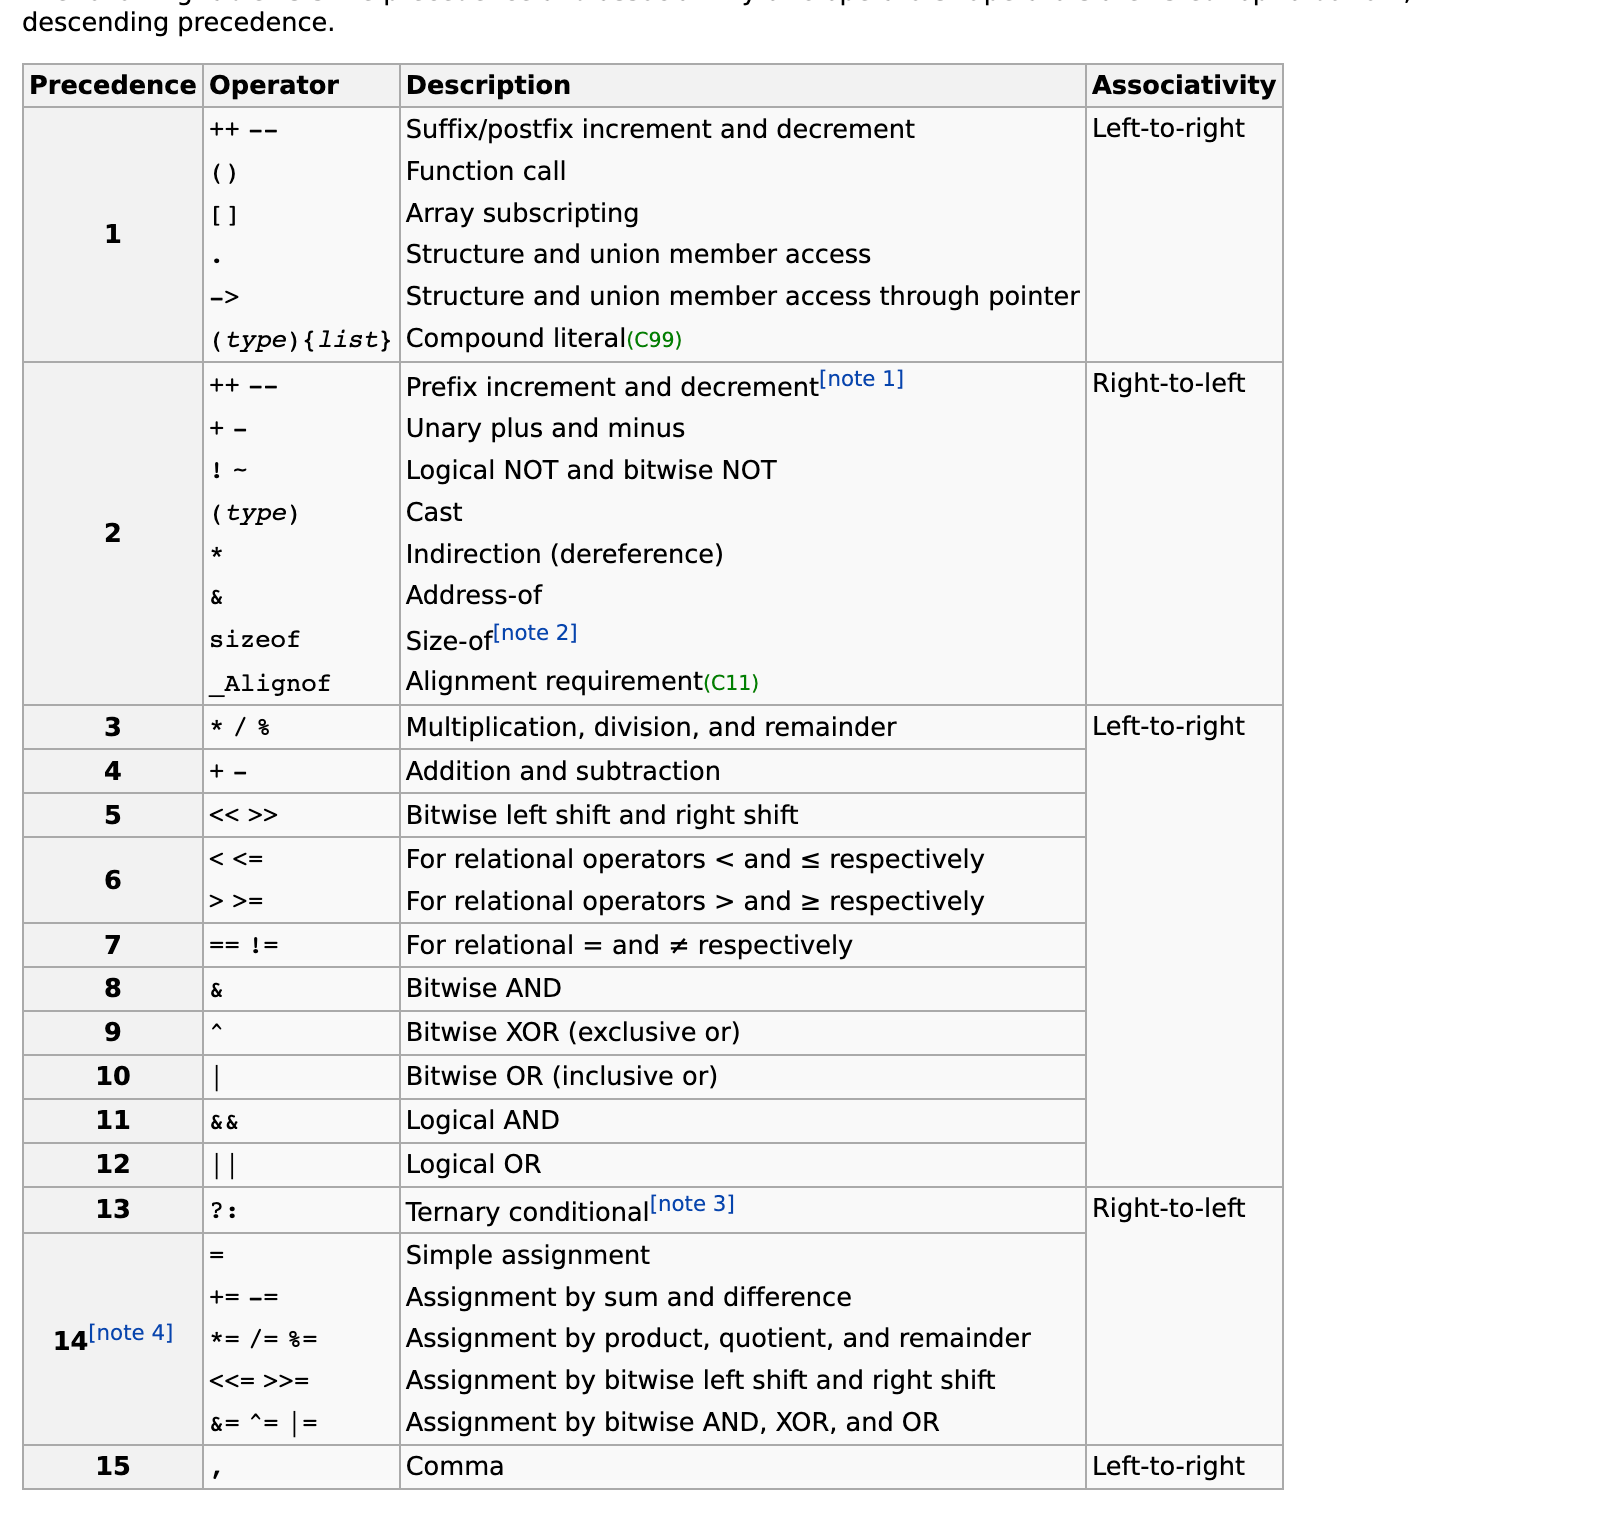

优先级按照从高到低排序



In [13]:
## 定义运算优先级的table
from enum import Enum
class Associatvity(Enum):
    LeftToRight = 1 
    RightToLeft = 2

In [15]:
class ExpressionableOpPrecedenceGroup(object):
    def __init__(self, ops, associatvity):
        self.op = ops
        self.associatvity = associatvity
## 定义运算符的数组
## 此处只是简化的定义, 具体定义见上面的截图
op_precedence = [
    ExpressionableOpPrecedenceGroup(["++", "--", "()", "[]"], Associatvity.LeftToRight),
    ExpressionableOpPrecedenceGroup(["&="], Associatvity.LeftToRight),
]

In [1]:
class NodeExp(object):
    def __init__(self, left, op, right):
        self.left = left
        self.right = right
        self.op = op

class Node(object):
    def __init__(self, node_type, node_exp):
        self.token = token
        self.node_type = node_type # node的类型, number类型, identifier 类型, string类型, keyword, operator, struct, union ...
        self.node_value = node_value
        self.exp = node_exp

def parse_expressionable_for_op():
    ## 调用 `parse_expressionable` 递归的解析节点
    pass 


def parse_exp():
    ## 调用 `parse_exp_normal`
    pass 

def parser_left_op_has_priority(op_left, op_right)->bool:
    ## 遍历 `op_precedence`, 判断应该使用 op_left, op_right的 associatvity,
    ## 返回 associatvity 是否从左到右
    pass 


def parser_node_shift_children_left(node):
    ## 简单来说就是节点的左子节点与右子节点的左节点合并成节点1
    ## 节点1与右子节点合并成一个新的节点2
    pass 


def parse_reorder_expression(node):
    ## 如果当前节点类型不是 NODE_TYPE_EXPRESSION, 则返回
    ## 如果当前左子节点类型不是 NODE_TYPE_EXPRESSION 并且右子节点的类型也不是 NODE_TYPE_EXPRESSION, 则返回
    ##                      |
    ##              left    op1    right
    ##                      left   op2   right
    ## 如果当前左节点类型不是 NODE_TYPE_EXPRESSION 并且 右节点类型是 NODE_TYPE_EXPRESSION:
    ##       获取右节点的表达式 op_right
    ##       调用 `parser_left_op_has_priority` 判断当前节点的op优先级是否高于 op_right
    ##            调用 `parser_node_shift_children_left` 重新组合节点
    ##            调用 `parse_reorder_expression`对新组合节点的左子节点重排序
    ##            调用 `parse_reorder_expression`对新组合节点的右子节点重排序
    pass 


def parse_exp_normal():
    
    ## 获取队头的node为left_node
    ## 判断left_node是否为空, 是空就直接返回
    ## 当前node队头pop出来
    ## 调用`token_next`将指针下移到表达式右边的token上
    ## 调用 `parse_expressionable_for_op` 递归的获得右节点
    ## 左右节点合并成为一个新的节点, 节点类型为 NODE_TYPE_EXPRESSION
    ## 然后调用 `parse_reorder_expression`对新点进行冲排序合并
    ## 最终得到一个新的节点, 并push到队列中
    pass 


def parse_expressionable_single_node():
    # 判断当前的token类型, 如果是数字, 那么调用 `parse_single_token_to_node`, 并返回0代表需要继续解析token获取新的node
    # 如果当前的token类型是operator, 那么调用`parse_exp` 解析表达式并返回是否还要继续循环的结果
    pass 


def parse_expressionable():
    ## 在一个循环内一次调用parse_expressionable_single_node, 如果返回的是0, 那么继续, 否则跳出循环
    pass 


def parse_next():

    ## 在一个大循环内部
    ## 依次读取每一个token
    ## 如果类型在数字类型， identifier，字符串的, 通过 `parse_expressionable` 创建节点，并返回 0 代表外边的parse仍需要调用该函数来读取新的node
    ## 返回 -1 代表不需要读取新的token解析
    pass 
